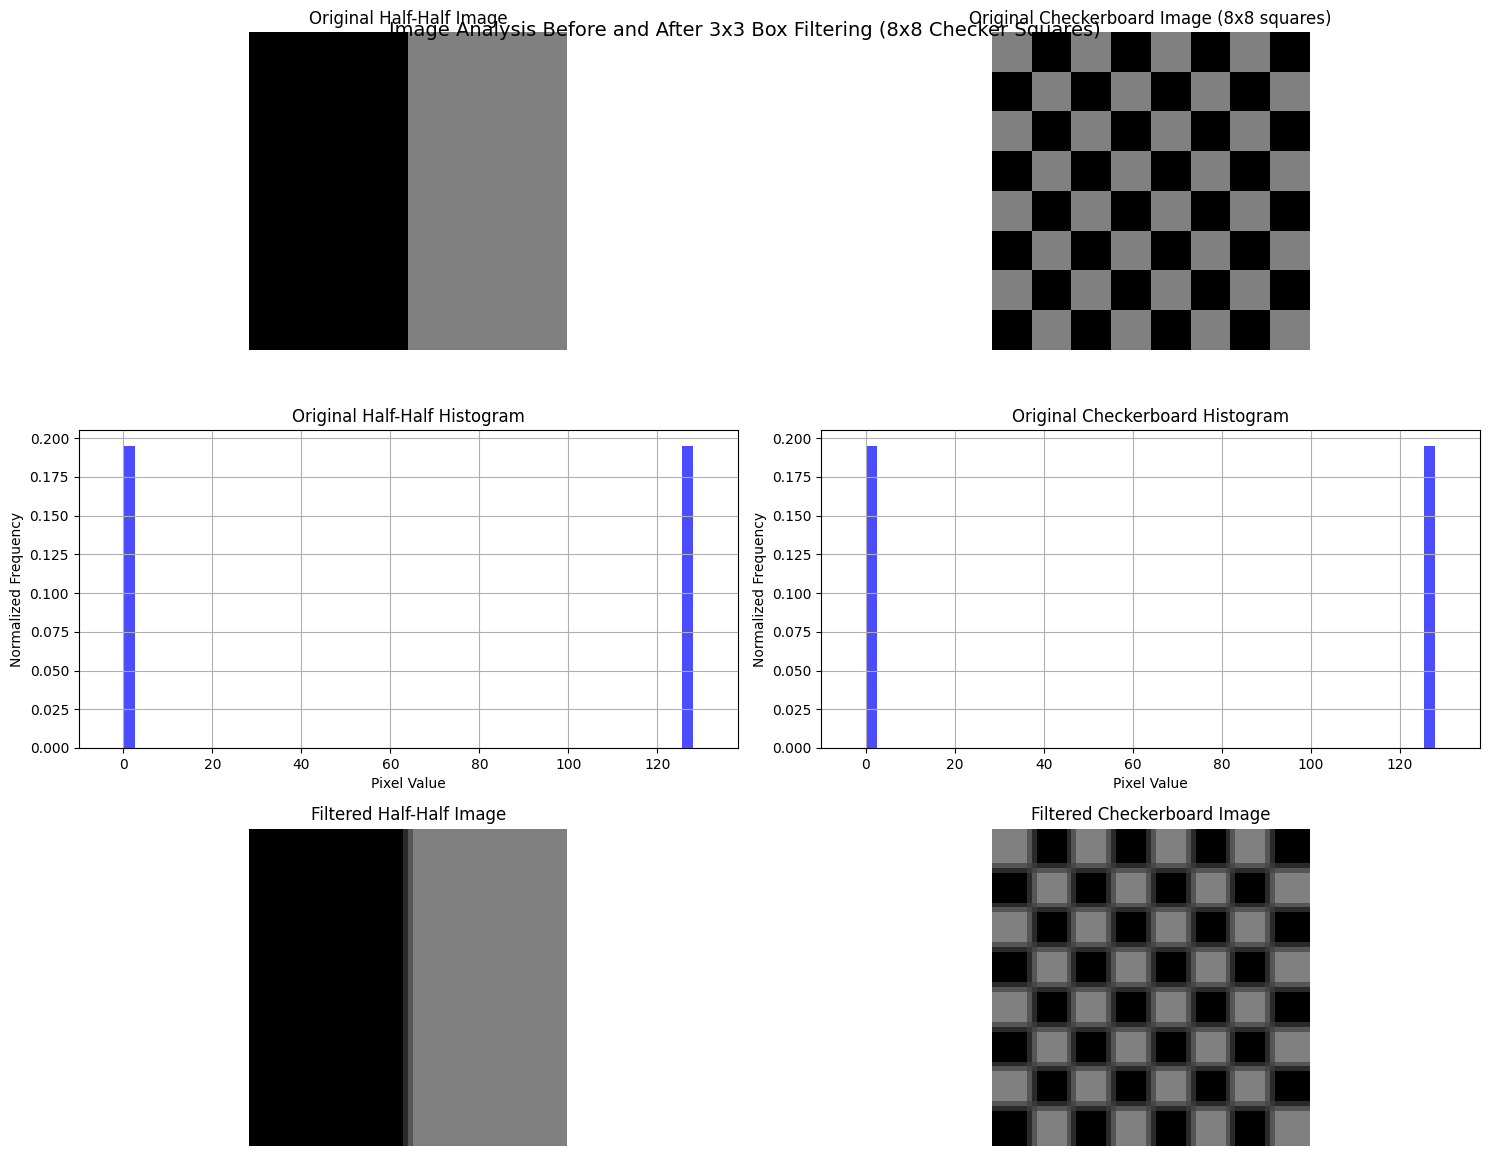

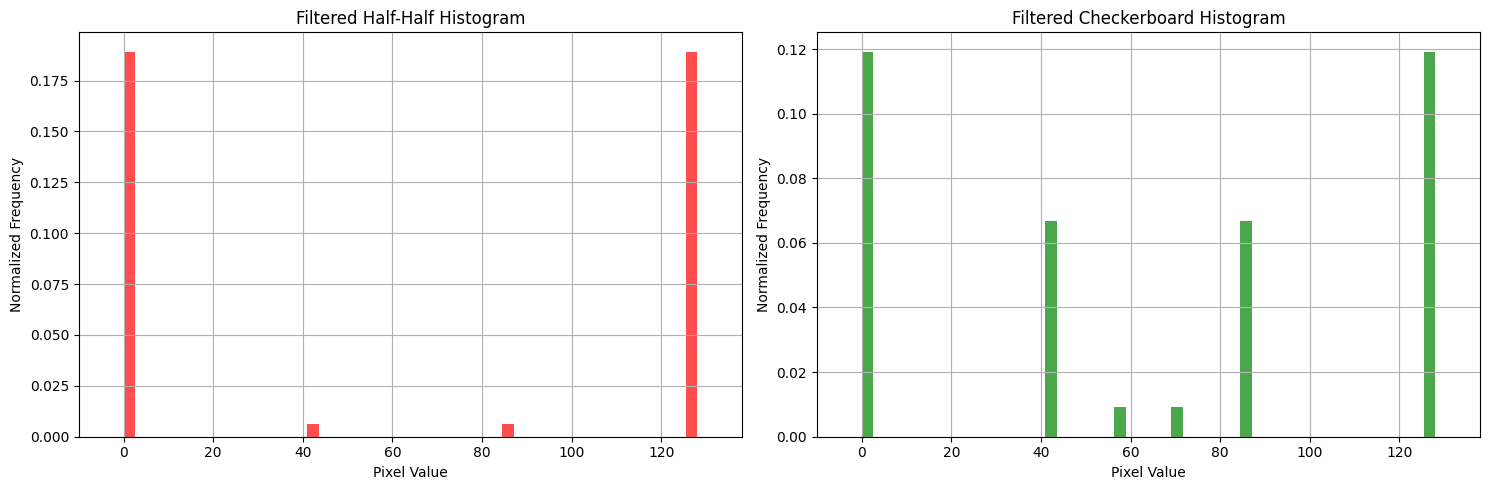


Analysis of Pixels:

Before Filtering:
Total pixels: 4096
Pixels at 0: 2048 (50.0%)
Pixels at 128: 2048 (50.0%)

After Filtering:
Unchanged pixels (within 0.1 of original values): 2500 (61.0%)
Changed pixels: 1596 (39.0%)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def create_images(N, checker_size=8):
    # Create half-half image
    half_half = np.zeros((N, N))
    half_half[:, N//2:] = 128  # Half gray (128), half black (0)

    # Create checkerboard with 8x8 squares
    checkerboard = np.zeros((N, N))
    for i in range(0, N, checker_size*2):
        for j in range(0, N, checker_size*2):
            # Create 8x8 gray square
            if i+checker_size <= N:
                if j+checker_size <= N:
                    checkerboard[i:i+checker_size, j:j+checker_size] = 128
            if i+checker_size*2 <= N:
                if j+checker_size*2 <= N:
                    checkerboard[i+checker_size:i+checker_size*2,
                               j+checker_size:j+checker_size*2] = 128

    return half_half, checkerboard

def box_filter(image, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
    padded = np.pad(image, kernel_size//2, mode='edge')
    result = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = np.sum(padded[i:i+kernel_size, j:j+kernel_size] * kernel)

    return result

# Create images with size that's multiple of 16 (for even checkerboard)
N = 64
half_half, checkerboard = create_images(N)

# Apply filtering
half_half_blurred = box_filter(half_half)
checkerboard_blurred = box_filter(checkerboard)

# Create figure with subplots
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Image Analysis Before and After 3x3 Box Filtering (8x8 Checker Squares)',
             fontsize=14, y=0.95)

# Original Images
plt.subplot(321)
plt.imshow(half_half, cmap='gray', vmin=0, vmax=255)
plt.title('Original Half-Half Image')
plt.axis('off')

plt.subplot(322)
plt.imshow(checkerboard, cmap='gray', vmin=0, vmax=255)
plt.title('Original Checkerboard Image (8x8 squares)')
plt.axis('off')

# Original Histograms
plt.subplot(323)
plt.hist(half_half.ravel(), bins=50, density=True, color='blue', alpha=0.7)
plt.title('Original Half-Half Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.grid(True)
plt.xlim(-10, 138)

plt.subplot(324)
plt.hist(checkerboard.ravel(), bins=50, density=True, color='blue', alpha=0.7)
plt.title('Original Checkerboard Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.grid(True)
plt.xlim(-10, 138)

# Filtered Images
plt.subplot(325)
plt.imshow(half_half_blurred, cmap='gray', vmin=0, vmax=255)
plt.title('Filtered Half-Half Image')
plt.axis('off')

plt.subplot(326)
plt.imshow(checkerboard_blurred, cmap='gray', vmin=0, vmax=255)
plt.title('Filtered Checkerboard Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# New figure for detailed histogram comparison after filtering
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(half_half_blurred.ravel(), bins=50, density=True, color='red', alpha=0.7)
plt.title('Filtered Half-Half Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.grid(True)
plt.xlim(-10, 138)

plt.subplot(122)
plt.hist(checkerboard_blurred.ravel(), bins=50, density=True, color='green', alpha=0.7)
plt.title('Filtered Checkerboard Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.grid(True)
plt.xlim(-10, 138)

plt.tight_layout()
plt.show()

# Print analysis of unique values and percentages
print("\nAnalysis of Pixels:")
print("\nBefore Filtering:")
print(f"Total pixels: {N*N}")
print(f"Pixels at 0: {np.sum(checkerboard == 0)} ({100*np.sum(checkerboard == 0)/(N*N):.1f}%)")
print(f"Pixels at 128: {np.sum(checkerboard == 128)} ({100*np.sum(checkerboard == 128)/(N*N):.1f}%)")

print("\nAfter Filtering:")
unchanged_threshold = 0.1  # Consider values within 0.1 of original as unchanged
original_values = np.array([0, 128])

# Count pixels close to original values
close_to_original = np.sum([np.abs(checkerboard_blurred - val) < unchanged_threshold
                           for val in original_values], axis=0)
unchanged_count = np.sum(close_to_original)

print(f"Unchanged pixels (within {unchanged_threshold} of original values): "
      f"{unchanged_count} ({100*unchanged_count/(N*N):.1f}%)")
print(f"Changed pixels: {N*N - unchanged_count} ({100*(N*N - unchanged_count)/(N*N):.1f}%)")